In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1.数据加载

In [2]:
data = pd.read_csv(r"C:\Users\lihuiting\Desktop\数据分析案例应用\ccf_offline_stage1_train.csv",parse_dates = ['Date_received','Date']) #parse_dates:将指定的列加载成日期格式
data.info() #175w+数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   User_id        int64         
 1   Merchant_id    int64         
 2   Coupon_id      float64       
 3   Discount_rate  object        
 4   Distance       float64       
 5   Date_received  datetime64[ns]
 6   Date           datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 93.7+ MB


#### 字段解释
#### User_id:用户id
#### Merchant_id:商户id
#### Coupon_id：优惠券ID，如果为空值就是没有优惠券消费
#### Discount_rate:优惠率
#### Distance:User经常活动的地点离该 merchant的最近距离,计算方法是x*500,取0指小于500米，10代表大于5公里。
#### Date_received:领取优惠券日期
#### Date：消费日期，如果Date = null&Coupon_id !=0表示领取了消费券但是没有使用。

In [3]:
data.head(10)   #NAT是时间日期格式的空值

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


# 2.数据规整

2.1计算折扣率

In [4]:
data.isnull().sum()   #如果是空值，True相当于1，所以相加之后就可以知道每一列有多少个空值
#优惠券ID，折扣率，领券日期可能存在同时为空的情况。
data['Discount_rate'] = data['Discount_rate'].fillna('null')
data

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,null,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,null,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,30:1,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,null,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,50:10,6.0,2016-06-13,NaT


In [5]:
def discount_rate_opt(s):#s代码每一个元素
    if ':' in s:
        split = s.split(':')
        discount_rate = (int(split[0])-int(split[1]))/int(split[0])
        return round(discount_rate,2)  #返回的折扣率保留2位小数
    elif s == 'null':
        return np.NAN
    else:
        return float(s)

In [6]:
#对折扣数据进行数据转化，把discount_rate列中的满减转化为折扣率
data['Discount_rate'] = data['Discount_rate'].map(discount_rate_opt)
data

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT


## 2.2 Coupon_id字段，null代表无优惠券，此时Discount_rate以及Date_received字段无意义
## 检查Coupon_id和Discount_rate与Date_received判断空值与非空值是否一一对应

In [7]:
#np.all()判断一个迭代数据中是否都为True,如果是则返回True，如果不是返回False

In [8]:
nan1 = data['Coupon_id'].isnull()  #判断优惠券是否为空
nan2 = data['Date_received'].isnull() #判断领券日期是否为空
nan3 = data['Date_received']
np.all(nan1 == nan2) 

True

In [9]:
#np.all的结果为True，说明这两列数据存在一一对应关系，即都为空值或都不为空值

In [10]:
np.all(nan1 == nan3)

False

### 2.3
如果Date ==null & Coupon_id!=null，优惠券未消费(no_consume)
如果Date=null&Coupon_id = null,无券无消费(no_coupon_no_consume)
如果Date!=null&Coupon_id = null，无券有消费(no_coupon)
如果Date!=null&Coupon_id!=null,有券有消费(coupon_consume)


In [11]:
ncon = data[(~data['Coupon_id'].isnull())&(data['Date'].isnull())]
ncncon = data[(data['Coupon_id'].isnull())&(data['Date'].isnull())]
nc = data[(data['Coupon_id'].isnull())&(~data['Date'].isnull())]
cc = data[(~data['Coupon_id'].isnull())&(~data['Date'].isnull())]

In [12]:
print('有券未消费:{}'.format(len(ncon)))
print('无券未消费:{}'.format(len(ncncon)))
print('无券有消费:{}'.format(len(nc)))
print('有券有消费:{}'.format(len(cc)))

有券未消费:977900
无券未消费:0
无券有消费:701602
有券有消费:75382


In [13]:
consume_status_dict = {'ncon':len(ncon),'nc':len(nc),'cc':len(cc)}
consume_status = pd.Series(consume_status_dict)
consume_status

ncon    977900
nc      701602
cc       75382
dtype: int64

<Axes: >

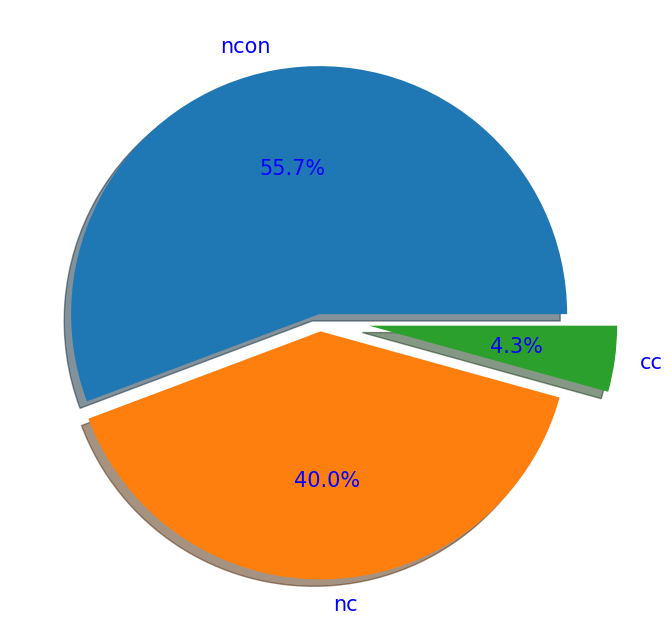

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,10))
consume_status.plot.pie(ax=ax,autopct="%1.1f%%",shadow =True,explode=[0.02,0.05,0.2],textprops = {'fontsize':15,'color':'blue'})

In [15]:
#有券未消费占比55.7%，说明大多数人拿完优惠券后尚未使用
#无券消费用户占比40%，说明很多人没有使用优惠券，可能优惠券吸引力不大，客户不在意，或者是新用户比较多。
#用券消费用户占比4.3%，说明优惠券使用率不高，可以考虑加大优惠力度。

# 3.在有券消费人群中，分析距离和优惠折扣力度，以及折后平均

3.1

In [16]:
data

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT


In [17]:
df1 = data.groupby('Merchant_id')['Distance'].mean() #各个商家对应的顾客到店平均距离
df1

Merchant_id
1       0.000000
2       6.181818
3       5.375000
4       0.000000
5       1.493151
          ...   
8852    0.750000
8853    3.200000
8854    1.100000
8855    1.000000
8856    0.068548
Name: Distance, Length: 8415, dtype: float64

In [18]:
df1[df1==0]

Merchant_id
1       0.0
4       0.0
9       0.0
10      0.0
14      0.0
       ... 
8806    0.0
8814    0.0
8838    0.0
8846    0.0
8849    0.0
Name: Distance, Length: 984, dtype: float64

In [19]:
#各商家对应的顾客到店消费平均折扣力度
df2 = data.groupby('Merchant_id')['Discount_rate'].mean() 
df2.describe() #可以看到所有商家的平均折扣是88折

count    5599.000000
mean        0.888638
std         0.084917
min         0.200000
25%         0.836251
50%         0.900000
75%         0.950000
max         0.990000
Name: Discount_rate, dtype: float64

<Axes: ylabel='Frequency'>

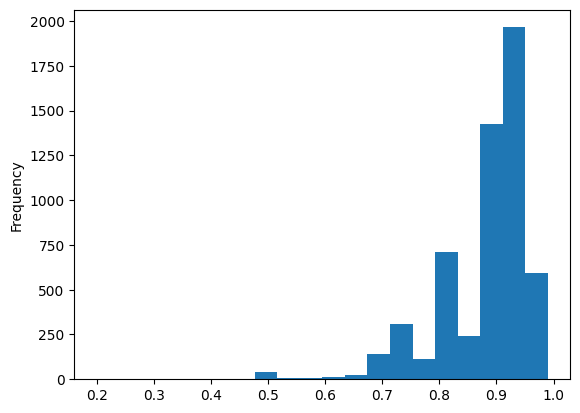

In [20]:
df2.plot.hist(bins=20) #大部分商家都是8~9折

3.2持券到店消费人数最多的商家

In [21]:
#先筛选持券消费人的信息,对用户ID进行去重统计数量
data1 = data[(~data['Coupon_id'].isnull())&(~data['Date'].isnull())]
data1

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,0.95,0.0,2016-05-16,2016-06-13
33,1113008,1361,11166.0,0.95,0.0,2016-05-15,2016-05-21
38,2881376,8390,7531.0,0.75,0.0,2016-03-21,2016-03-29
69,114747,6901,2366.0,0.83,0.0,2016-05-23,2016-06-05
75,114747,5341,111.0,0.83,0.0,2016-01-27,2016-02-21
...,...,...,...,...,...,...,...
1754833,1437872,7706,416.0,0.90,4.0,2016-01-29,2016-02-02
1754873,212662,2934,5686.0,0.83,2.0,2016-03-21,2016-03-30
1754877,212662,3021,3739.0,0.97,6.0,2016-05-04,2016-05-08
1754878,212662,2934,5686.0,0.83,2.0,2016-03-21,2016-03-22


In [22]:
df3 = data1.groupby('Merchant_id')['User_id'].apply(lambda x:len(x.unique()))
df3

Merchant_id
3        1
4        2
5        3
13       1
14       1
        ..
8844    12
8849     1
8850     3
8852     1
8856     2
Name: User_id, Length: 4076, dtype: int64

In [23]:
df3.sort_values()

Merchant_id
3          1
2810       1
2807       1
2795       1
2791       1
        ... 
2099    1401
6485    2029
3381    2248
760     2627
5341    2800
Name: User_id, Length: 4076, dtype: int64

In [24]:
df3.describe()

count    4076.000000
mean       12.379539
std        95.824200
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      2800.000000
Name: User_id, dtype: float64

In [25]:
df500 = df3[df3>500] #过滤出持券消费人数>500的商家id
df500.sort_values(ascending = False)

Merchant_id
5341    2800
760     2627
3381    2248
6485    2029
2099    1401
2934    1310
450     1094
3532     968
7555     925
1520     870
6901     855
3621     851
4142     832
1379     587
1469     584
1433     559
Name: User_id, dtype: int64

In [26]:
len(df500) #共有16家店铺持券消费人数在500人以上

16

In [27]:
df500.index.values

array([ 450,  760, 1379, 1433, 1469, 1520, 2099, 2934, 3381, 3532, 3621,
       4142, 5341, 6485, 6901, 7555], dtype=int64)

这批商家对优惠券的使用方法得当，消费者喜欢用优惠券进行消费，可以适当借鉴这批商家的推广力度

3.3持券消费人数在500人以上的商家，连接顾客到店平均距离和平均折扣力度

In [28]:
#merge
df500

Merchant_id
450     1094
760     2627
1379     587
1433     559
1469     584
1520     870
2099    1401
2934    1310
3381    2248
3532     968
3621     851
4142     832
5341    2800
6485    2029
6901     855
7555     925
Name: User_id, dtype: int64

In [29]:
df500.name = 'customer_num'

In [30]:
df2

Merchant_id
1            NaN
2       0.800000
3       0.670000
4       0.830000
5       0.750000
          ...   
8852    0.950000
8853         NaN
8854    0.950000
8855         NaN
8856    0.943421
Name: Discount_rate, Length: 8415, dtype: float64

In [31]:
df1

Merchant_id
1       0.000000
2       6.181818
3       5.375000
4       0.000000
5       1.493151
          ...   
8852    0.750000
8853    3.200000
8854    1.100000
8855    1.000000
8856    0.068548
Name: Distance, Length: 8415, dtype: float64

In [32]:
#先连接df500和df1
dfmerge = pd.merge(left=df500,right=df1,on='Merchant_id',how='inner')
dfmerge

,customer_num,Distance
Merchant_id,,
450,1094,3.512198
760,2627,1.225028
1379,587,0.783554
1433,559,3.993684
1469,584,2.652724
1520,870,NaN
2099,1401,1.844211
2934,1310,0.982985
3381,2248,2.713991


In [33]:
dfmerge1 = pd.merge(left=dfmerge,right=df2,on='Merchant_id',how='inner')
dfmerge1
#得到了持券消费人数大于500商家的平均距离和平均折扣

,customer_num,Distance,Discount_rate
Merchant_id,,,
450,1094,3.512198,0.828874
760,2627,1.225028,0.807391
1379,587,0.783554,0.830516
1433,559,3.993684,0.808494
1469,584,2.652724,0.708007
1520,870,NaN,0.921321
2099,1401,1.844211,0.900000
2934,1310,0.982985,0.830000
3381,2248,2.713991,0.866312


3.4找到变量之间的相关系数

In [34]:
#持券到店人数与到店距离和折扣力度之间的关系
dfcorr = dfmerge1.corr(method='pearson')

In [35]:
dfcorr

,customer_num,Distance,Discount_rate
customer_num,1.000000,-0.261520,0.049068
Distance,-0.261520,1.000000,-0.146687
Discount_rate,0.049068,-0.146687,1.000000


In [36]:
import seaborn as sns 

<Axes: >

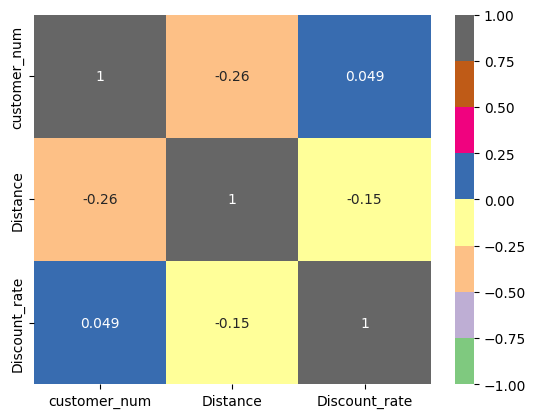

In [38]:
sns.heatmap(data = dfcorr,annot=True,cmap = 'Accent',vmax=1,vmin=-1)

In [ ]:
由图可知：
1、到店消费人数的多少与顾客到店铺的距离之间呈现负相关，为低度相关